In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('cleaned_data.xlsx')
df.head()

,sales,Total spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


In [9]:
# input should be 2d array or dataframe
X = df[['Total spend']]
y = df['sales']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=True)

# 4) Modelling 

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Coefficents :',model.coef_)
print('Intercept :',model.intercept_)

Coefficents : [0.05012858]
Intercept : 4008.762867242771


In [12]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,random_state=True)

import statsmodels.formula.api as smf
model1 = smf.ols('y_train~X_train',data=df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     574.4
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           1.71e-54
Time:                        16:49:00   Log-Likelihood:                -1478.9
No. Observations:                 160   AIC:                             2962.
Df Residuals:                     158   BIC:                             2968.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4008.7629    454.839      8.814      0.000    3110.414    4907.112
X_train        0.0501      0.002     23.966      0.000       0.046       0.054
==============================================================================
Omnibus:                        6.431   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.139
Skew:                          -0.401   Prob(JB):                       0.0464
Kurtosis:                       3.526   Cond. No.                     4.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5 ) Evaluation
### calculate Train accuracy and Train Rmse

In [14]:
# prediction on train data
ypred_train = model.predict(X_train)

#evaluation
from sklearn.metrics import mean_squared_error
print('Train RMSE : ',np.sqrt(mean_squared_error(y_train,ypred_train)))

from sklearn.metrics import r2_score
print('Train R2 : ',r2_score(y_train,ypred_train))

Train RMSE :  2500.8686613148743
Train R2 :  0.7842622790832501


### cross validation score

In [15]:
from sklearn.model_selection import cross_val_score
print('CV Score : ',cross_val_score(model,X_train,y_train,cv=5,scoring= 'r2').mean())

CV Score :  0.7694233852989776


### Calculate Test accuracy and Test Rmse

In [16]:
# prediction on test data
ypred_test = model.predict(X_test)

#evaluation
print('Test Rmse : ',np.sqrt(mean_squared_error(y_test,ypred_test)))
print('Test R2 : ',r2_score(y_test,ypred_test))

Test Rmse :  2923.7294715837625
Test R2 :  0.539781153461508


## Linearity of errors

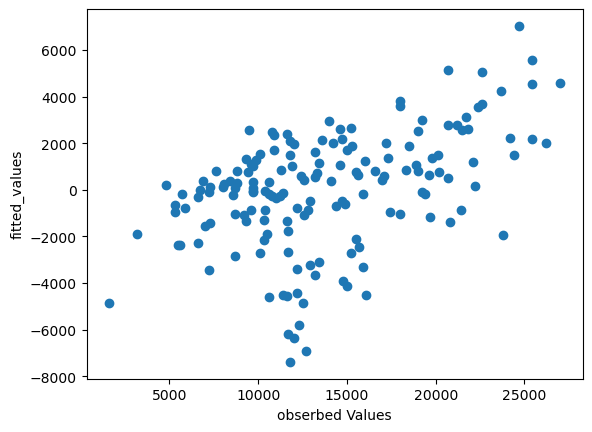

In [23]:
train_error = y_train - ypred_train

plt.scatter(y_train,train_error)
plt.xlabel('obserbed Values')
plt.ylabel('fitted_values')
plt.show()

### Normality of Errors

In [21]:
train_error.skew()

-0.40516188829522337

#### Equal variance of errors

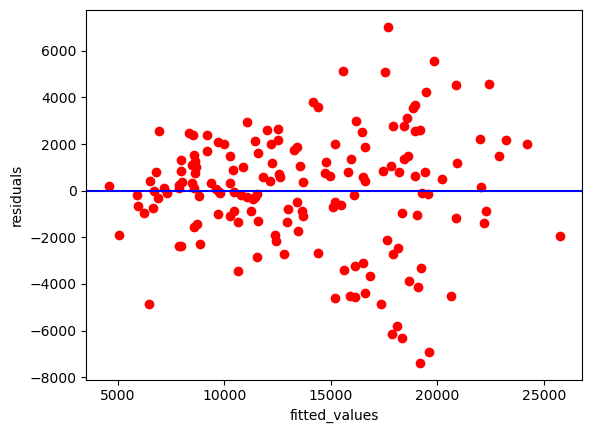

In [24]:
plt.scatter(ypred_train,train_error,c='r')
plt.axhline(y=0,color = 'blue')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

In [25]:
model.predict([[100000]])

C:\Users\kawle\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9021.62084964])

In [26]:
sales  = 4008.762867242771 + 0.05012858*100000
sales

9021.620867242771

# save a model

In [28]:
from joblib import dump
dump(model,'sales_model.joblib') 

['sales_model.joblib']

In [41]:
from pickle import dump
dump(model,open('sales_model.pkl','wb'))